## Full Data Workflow A-Z: Group Operations

In [1]:
import pandas as pd

In [4]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


The least efficient cars are from the USA.

In [2]:
cars=pd.read_csv("cars.csv")

In [3]:
cars.groupby("origin").mpg.mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [6]:
mpg_by_model_year=cars.groupby("model_year").mpg.mean()

In [8]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

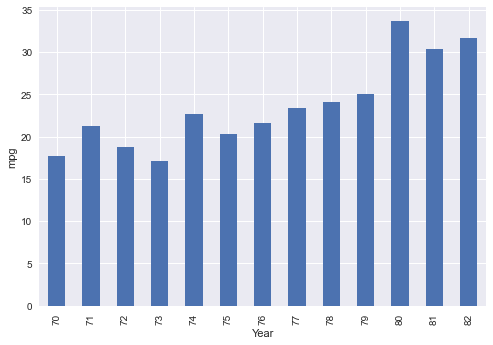

In [11]:
mpg_by_model_year.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("mpg")
plt.show()

The cars are getting more fuel efficient over time.

In [23]:
mpg_year_origin=cars.groupby(["model_year","origin"]).mpg.mean().unstack().round(2)
mpg_year_origin

origin,europe,japan,usa
model_year,,,
70,25.20,25.50,15.27
71,28.75,29.50,18.10
72,22.00,24.20,16.28
73,24.00,20.00,15.03
74,27.00,29.33,18.33
75,24.50,27.50,17.55
76,24.25,28.00,19.43
77,29.25,27.42,20.72
78,24.95,29.69,21.77


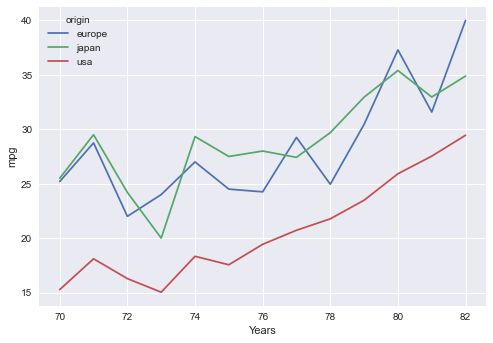

In [24]:
mpg_year_origin.plot()
plt.xlabel("Years")
plt.ylabel("mpg")
plt.show()

It seems that manufacturer from europe, japan and usa were able to improve efficiency!

In [26]:
cars.groupby(["model_year","origin"]).mpg.agg(["mean","min","max"]).unstack().round(2)

mean                  min                max            
origin     europe  japan    usa europe japan   usa europe japan   usa
model_year                                                           
70          25.20  25.50  15.27   24.0  24.0   9.0   26.0  27.0  22.0
71          28.75  29.50  18.10   27.0  25.0  12.0   30.0  35.0  28.0
72          22.00  24.20  16.28   18.0  19.0  11.0   26.0  28.0  28.0
73          24.00  20.00  15.03   19.0  18.0  11.0   29.0  22.0  23.0
74          27.00  29.33  18.33   24.0  24.0  13.0   31.0  32.0  28.0
75          24.50  27.50  17.55   22.0  24.0  13.0   29.0  33.0  23.0
76          24.25  28.00  19.43   16.5  19.0  13.0   29.5  33.0  29.0
77          29.25  27.42  20.72   21.5  21.5  15.0   36.0  33.5  33.5
78          24.95  29.69  21.77   16.2  21.1  17.5   43.1  39.4  36.1
79          30.45  32.95  23.48   25.4  31.8  15.5   37.3  34.1  35.7
80          37.29  35.40  25.91   29.8  23.7  19.1   44.3  46.6  32.1
81          31.58  32.96  27.53   28.1  24.2  17.6   34.5  39.1  39.0
82          40.00  34.89  29.45   36.0  31.0  22.0   44.0  38.0  38.0

Lets look at two most fuel efficient cars for each combination of model_year & origin!

In [34]:
def fuel_efficient(df):
    return df.nlargest(2,"mpg").loc[:,["name","mpg"]]

In [36]:
most_eff=cars.groupby(["model_year","origin"]).apply(fuel_efficient)
most_eff

name   mpg
model_year origin                                             
70         europe 19                vw 1131 deluxe sedan  26.0
                  23                            bmw 2002  26.0
           japan  18                        datsun pl510  27.0
                  14               toyota corona mark ii  24.0
           usa    15                     plymouth duster  22.0
...                                                  ...   ...
82         europe 375                        vw rabbit l  36.0
           japan  383                        honda civic  38.0
                  385                      datsun 310 gx  38.0
           usa    378             plymouth horizon miser  38.0
                  387  oldsmobile cutlass ciera (diesel)  38.0

[78 rows x 2 columns]

In [38]:
most_eff=most_eff.droplevel(2)

In [39]:
most_eff.head(20)

name   mpg
model_year origin                                
70         europe      vw 1131 deluxe sedan  26.0
           europe                  bmw 2002  26.0
           japan               datsun pl510  27.0
           japan      toyota corona mark ii  24.0
           usa              plymouth duster  22.0
           usa                ford maverick  21.0
71         europe               peugeot 304  30.0
           europe                 fiat 124b  30.0
           japan                datsun 1200  35.0
           japan        toyota corolla 1200  31.0
           usa          chevrolet vega 2300  28.0
           usa             plymouth cricket  26.0
72         europe           renault 12 (sw)  26.0
           europe                 vw type 3  23.0
           japan            datsun 510 (sw)  28.0
           japan   toyota corolla 1600 (sw)  27.0
           usa              dodge colt (sw)  28.0
           usa           dodge colt hardtop  25.0
73         europe                  fiat 128  29.0
           europe           vw super beetle  26.0

Lets calculate the mean mpg for each combination of model_year & origin and assign the corresponding group-specific value to all cars as a new column. Then,I will filter all cars where the absolute difference between mpg and group-specific mpg is greater than 10. These cars all outliers/special cases in their respective group.

In [46]:
cars["group_specific_mpg"]=cars.groupby(["model_year","origin"]).mpg.transform("mean").round(2)
cars.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,group_specific_mpg
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,15.27
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.27
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,15.27
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,15.27
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,15.27
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,15.27
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,15.27
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,15.27
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,15.27
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,15.27


In [58]:
cars["outliers"]=(cars.mpg-cars.group_specific_mpg).round(2)
cars.loc[cars.outliers.abs() > 10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,group_specific_mpg,outliers
83,28.0,4,98.0,80.0,2164,15.0,72,usa,dodge colt (sw),16.28,11.72
238,33.5,4,98.0,83.0,2075,15.9,77,usa,dodge colt m/m,20.72,12.78
244,43.1,4,90.0,48.0,1985,21.5,78,europe,vw rabbit custom diesel,24.95,18.15
245,36.1,4,98.0,66.0,1800,14.4,78,usa,ford fiesta,21.77,14.33
295,35.7,4,98.0,80.0,1915,14.4,79,usa,dodge colt hatchback custom,23.48,12.22
301,34.2,4,105.0,70.0,2200,13.2,79,usa,plymouth horizon,23.48,10.72
302,34.5,4,105.0,70.0,2150,14.9,79,usa,plymouth horizon tc3,23.48,11.02
308,33.5,4,151.0,90.0,2556,13.2,79,usa,pontiac phoenix,23.48,10.02
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,35.40,11.20
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs,35.40,-11.70
